# Predicting heart disease using machine learning 
This notebook is going to use various machine learning models and libraries in an attempt to prepare a model to predict heart disease based on their medical attributes.
We are going to take the following approach:
1. Problem Defination
2. Data
3. Evaluation 
4. Features
5. Modeling
6. Experimentaion

## 1. Problem Defination

 > Given the clinical record can we predict whether or not the pateint has heart disease.

##  2. Data

>Data available on kaggle.
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## 3. Evaluation 

>If the accuracy in prediction is above 95% during the proof of concept then we will pursue with the model.

## 4. Features

>What feature of the data really means  ,this can be done using creating data dictionary.


## Preparing our tools


In [ ]:
# Import all tools we used 
# Regularly EDA and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# To get plots in the notebook
%matplotlib inline

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing evaluation metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,plot_roc_curve

In [ ]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration (Exploratory Data Analysis) or EDA

This is to find more about the data and become master of the data we are working on ,so that any question can be answered regarding the dataset.

1. What are you trying to solve?
2. What kind/type of data you have and how to treat the data ?
3. What is missing from the data and how to deal with the missing data?
4. What are outliers and why you care about them ?
5. How to add or remove features to get most out of data?

In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

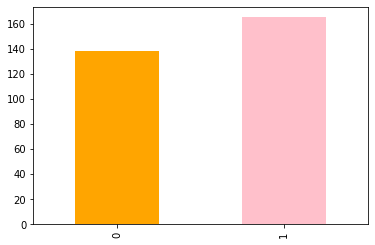

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["pink","orange"])

In [ ]:
df.info()
# Numeric everything

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Anything missing?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Nopeee!
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


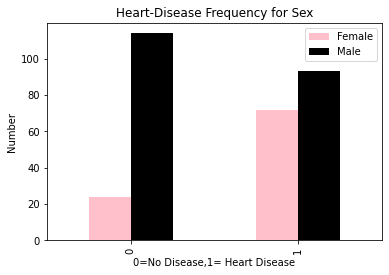

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["pink","black"])
plt.title("Heart-Disease Frequency for Sex")
plt.xlabel("0=No Disease,1= Heart Disease")
plt.ylabel("Number")
plt.legend(["Female","Male"])

Just on the basis of sex we can say that there's are around 75% chance for a female to have heart disease while 50%b chance for male.

In [ ]:
# Exploring more features
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

In [ ]:
# Length 91 means 91 different values of thalach in the dataset  

# Let's see Heart-rate and Age variation 

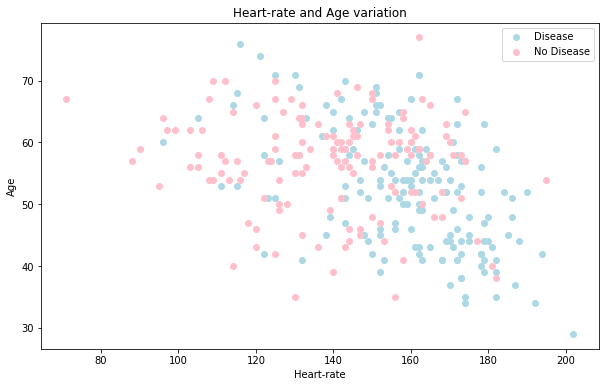

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.thalach[df.target==1],df.age[df.target==1],color="lightblue")
plt.scatter(df.thalach[df.target==0],df.age[df.target==0],color="pink")
plt.title("Heart-rate and Age variation")
plt.xlabel("Heart-rate")
plt.ylabel("Age")
plt.legend(["Disease","No Disease"]);

In [ ]:
# There's no particular pattern in the plot that can be used for prediction 

# Let's consider one more interesting feature to relate with prediction of heart disease


In [ ]:
pd.crosstab(df.target,df.cp)
#plt.bar(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


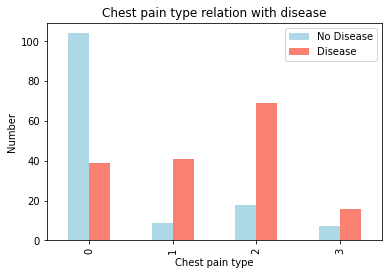

In [ ]:
#Let's make it more visible
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightblue","salmon"])
plt.title("Chest pain type relation with disease")
plt.xlabel("Chest pain type")
plt.ylabel("Number")
plt.legend(["No Disease","Disease"]);

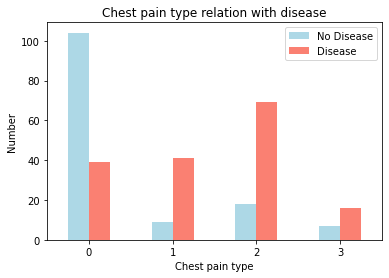

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightblue","salmon"])
plt.title("Chest pain type relation with disease")
plt.xlabel("Chest pain type")
plt.ylabel("Number")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [ ]:
# If you could see this difference 
# x-ticks

In [ ]:
 #Let's see the correlation 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


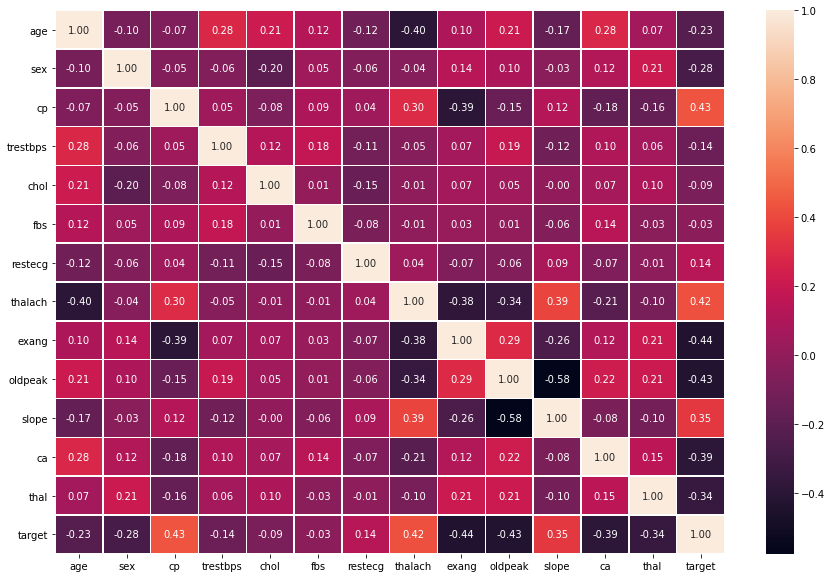

In [ ]:
# Let's make our correlation matrix better
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f")


## Preparing our model for evaluation


In [ ]:
X=df.drop("target",axis=1)
Y=df["target"]
np.random.seed(40)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [ ]:
len(Y_train)

242

We have split the data in train and test and will use train data to find pattern and test data to use the pattern
> We are going to try 3 different models:
 1. Logistic Regression (Daniel found it out from search)
 2. K-Nearest Neighbour Classifier
 3. Random Forest Classifier
> Last two from the Scikit-learn-model-map

In [ ]:
# Putting models in dictionary
models={"Logistic Regression": LogisticRegression(),
        "Nearest Neighbor": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}
# Now creating a function to fit and score models
def fit_and_score(models,X_train,Y_train,X_test,Y_test):
    """Arguments- models is a dictionary conatining models and train and test data
     """
    np.random.seed(40)
 # empty dictionary to score model score
    model_score={}
 # name is key and model is value
    for name,model in models.items():
      model.fit(X_train,Y_train)
      model_score[name]=model.score(X_test,Y_test)
    return model_score
 

In [ ]:
model_score=fit_and_score(models,X_train,Y_train,X_test,Y_test)
model_score

/home/guest/Desktop/new_project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'Nearest Neighbor': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

## Model comparison

<AxesSubplot:>

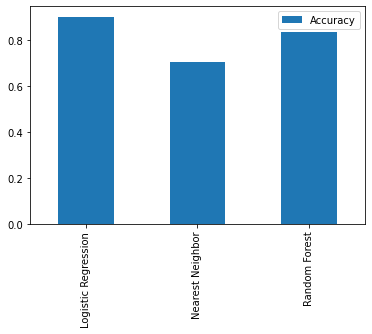

In [ ]:
model_compare=pd.DataFrame(model_score,index=["Accuracy"])
model_compare.T.plot.bar()

In [ ]:
# Clearly visible Logistics regression is more accurate.
# As we said we want atleast 95% accuracy .
# Let's move on.

# Now we need to improve our model 
These are the things we are going to do:
1. Hyperparameter tuning
2. Important features
3. Confusion matrix
4. Cross validation
5. Recall
6. Precision
7. F1_score
8. Classification_report
9. ROC curve
10. Area under the curve (AUC)
## Hyperparameter tuning

In [ ]:
# Let's try to improve KNeighbor model using hyperparameter tuning
# Empty list for storing score corresponding to diff parameter values
train_score=[]
test_score=[]
# after a reasearch we are going to tune n_neighbor
neighbor=range(1,21)
knn=KNeighborsClassifier()
# for loop to try all values
for i in neighbor:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_score.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))

In [ ]:
train_score

[1.0,
 0.7975206611570248,
 0.7892561983471075,
 0.7768595041322314,
 0.768595041322314,
 0.7603305785123967,
 0.7396694214876033,
 0.7148760330578512,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752,
 0.6900826446280992,
 0.7148760330578512,
 0.7148760330578512,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925]

In [ ]:
test_score

[0.6229508196721312,
 0.5901639344262295,
 0.7049180327868853,
 0.5737704918032787,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344]

The maximum accuuracy achieved using KNN model is 70.49 %


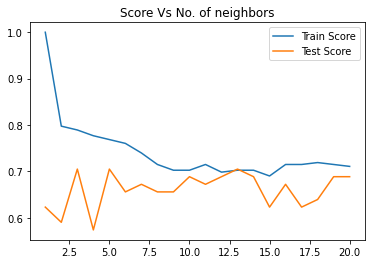

In [ ]:
# For Better understanding
plt.plot(neighbor,train_score)
plt.plot(neighbor,test_score)
plt.title("Score Vs No. of neighbors")
plt.legend(["Train Score","Test Score"])
print(f"The maximum accuuracy achieved using KNN model is {max(test_score)*100:.2f} %")

Now we should move to hypertuning uisng RandomizedSearchCV and GridSearchCV that will itself search for best hyperparameters and we don't have to manually run the loops

# Hyperparameter tuning using RandomizedSearchCV

 1. LogisticsRegression()
 2. RandomForestClassifier()

























In [ ]:
# Need to search a lotttt and then you will be able to workout
# Creating grid of parametersto be tuned for Logistics and Random Forest models
Log_grid={"C":np.logspace(-4,4,20),
          "solver":["liblinear"]}
Random_grid={"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
             "max_features":["sqrt","log2"],
             "min_samples_split":np.arange(2,10,20),
            "min_samples_leaf":np.arange(1,10,10)}

In [ ]:
np.random.seed(40
              )
rs_log_reg=RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=Log_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

In [ ]:
rs_log_reg.fit(X_train,Y_train)
rs_log_reg.score(X_test,Y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


0.9016393442622951

In [ ]:
#Let's find the best paramters for the data
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
## Let's hypertune RandomForestClassifier model
np.random.seed(40)
rs_random_forest=RandomizedSearchCV(estimator=RandomForestClassifier(),
                                    param_distributions=Random_grid,
                                    cv=5,
                                    verbose=True,
                                     n_iter=20)

In [ ]:
rs_random_forest.fit(X_train,Y_train)
rs_random_forest.score(X_test,Y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


0.8688524590163934

In [ ]:
# Here we can see the improvement in the score of the model
# Getting best parameters 
rs_random_forest.best_params_

{'n_estimators': 260,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 3}

In [ ]:
# above combination of parameters gives better result

In [ ]:
model_score

{'Logistic Regression': 0.9016393442622951,
 'Nearest Neighbor': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

In [ ]:
# And here we can see Logistic Regression model is still better than RandomForestClassifier

## And here's the time to use GridSearchCV
> We are going to work on LogisticRegression model now as it's the best among three

In [ ]:
# We need grid for logistic model (will use the previous) and rewriting for completeness only
Log_grid={"C":np.logspace(-4,4,30),
          "solver":["liblinear"]}
gs_log_reg=GridSearchCV(estimator=LogisticRegression(),
                        param_grid=Log_grid,
                        verbose=True,
                        cv=5)
gs_log_reg.fit(X_train,Y_train)
gs_log_reg.score(X_test,Y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


0.9016393442622951

In [ ]:
# And Look the score after Randomised and Grid SearchCV the result is same for LOgisticRegression
# But the best parameters are different can be observed

In [ ]:
gs_log_reg.best_params_,rs_log_reg.best_params_

({'C': 0.1082636733874054, 'solver': 'liblinear'},
 {'solver': 'liblinear', 'C': 0.615848211066026})

## Hypertuning is done now.

# Let's evaluate our tuned machine lerning classifier beyond accuracy!
 * ROC curve
 * Confusion_matrix
 * Precison
 * Recall
 * F1_score
 * Classification_report
 
 and it would be better if we use cross-validation wherever possible

In [ ]:
# We need to make predictions to comapre and evaluate our model
Y_pred=gs_log_reg.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

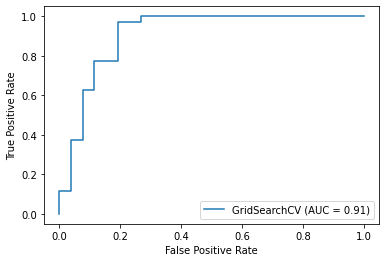

In [ ]:
# Ploting ROC curve and area under the curve
plot_roc_curve(gs_log_reg,X_test,Y_test)

Text(42.0, 0.5, 'Predicted Label')

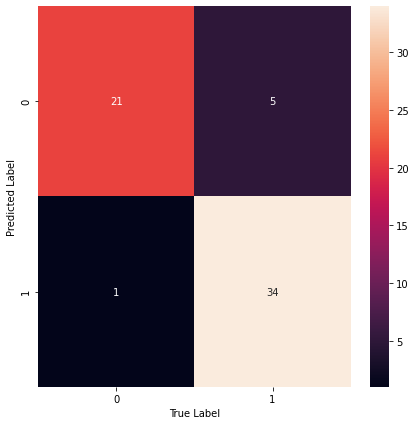

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),
            annot=True
           )
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## For classification report as well as cross-validated precision ,recall and f1_score

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



## Now we will use cross-validation and evaluate the tuned model using cross_val_score

In [ ]:
clf=LogisticRegression(C=0.1082636733874054,solver="liblinear")

In [ ]:
cross_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cross_acc=np.mean(cross_acc)
cross_acc

0.834808743169399

In [ ]:
cross_prec=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cross_prec=np.mean(cross_prec)
cross_prec

0.8182683982683983

In [ ]:
cross_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cross_recall=np.mean(cross_recall)
cross_recall

0.9030303030303031

In [ ]:
cross_f1=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cross_f1=np.mean(cross_f1)
cross_f1

0.8572876223964057

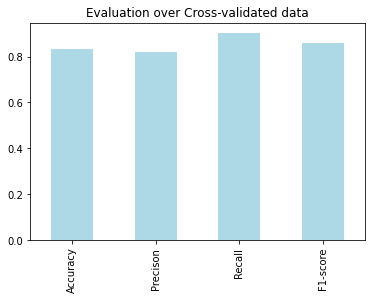

In [ ]:
# Visualizing the cross_validated evaluation matrix
cross_eval=pd.DataFrame({"Accuracy":cross_acc,
                         "Precison":cross_prec,
                         "Recall":cross_recall,
                        "F1-score":cross_f1},index=[0])
cross_eval.T.plot.bar(title="Evaluation over Cross-validated data",color=["Lightblue"],legend=False);

# Feature Importance
> Feature importance tells us which features contributed most to the result and how!?
 * Finding feature importance is different for each machine learning model
 * Search for it
 ## Let's do it for our LogisticRegression model

In [ ]:
clf=LogisticRegression(C=0.1082636733874054,solver="liblinear")
clf.fit(X_train,Y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [ ]:
clf.coef_

array([[ 0.00567294, -0.60072207,  0.66980091, -0.02126791, -0.00160921,
        -0.06916533,  0.27208603,  0.02893199, -0.3358502 , -0.40005284,
         0.23081045, -0.54819608, -0.50523544]])

In [ ]:
coef_dic=dict(zip(df.columns,clf.coef_[0]))
coef_dic

{'age': 0.0056729371632958155,
 'sex': -0.6007220720654468,
 'cp': 0.6698009068042059,
 'trestbps': -0.021267914846836714,
 'chol': -0.0016092122075890096,
 'fbs': -0.06916533154265331,
 'restecg': 0.2720860341377714,
 'thalach': 0.028931992574676497,
 'exang': -0.33585020317299197,
 'oldpeak': -0.4000528404000073,
 'slope': 0.23081045392087274,
 'ca': -0.5481960806376583,
 'thal': -0.5052354368626345}

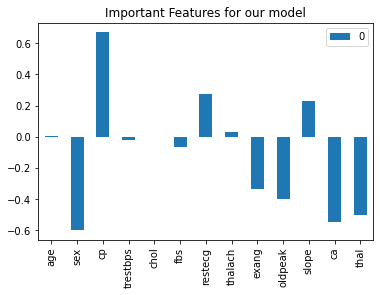

In [ ]:
coef_df=pd.DataFrame(coef_dic,index=[0])
coef_df.T.plot.bar(title="Important Features for our model");

 And from the plot we can tell about the features that matters most to the model an dfeatures like age,chol,thalach doesn't matter much, 

In [ ]:
# Let's review it 
# Positive correlation 
# Let's see slope
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [ ]:
# As we see as value of slope increases the no. of heart disease patients increases
# positively correlated

In [ ]:
# Negative correlation
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
# And here we see as sex(goes to 1) male the ratio has decreased